### Tarea 1: Franco Díaz - Nicolás Vallejos

In [1]:
# Importamos las librerías necesarias para la Tarea
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import scipy 
import seaborn as sns
from scipy.stats import nbinom

%matplotlib inline

In [2]:
# Leemos la data del archivo junaeb.csv
junaeb = pd.read_csv('../Tareas-LAB/junaebedit.csv')
junaeb.dropna(inplace=True)

In [3]:
# Hacemos una lectura de los datos y acotamos el rango de ciertas variables para evitar la presencia de datos atípicos
# Además, modificamos las variables "cercanía juegos" y "cercanía servicios" convirtiendolas en variables binarias donde:
# cercania_juegos(1=si existen juegos infantiles cerca del hogar, 0=no existen juegos cercanos)
# cercania_servicios(1=si existen servicios de salud cercanos, 0= no existen servicios cercanos)

junaeb.reset_index(drop=True, inplace=True)
junaeb=junaeb[(junaeb["vive_madre"] < 2)]
junaeb=junaeb[(junaeb["n_personas"] < 14)]
junaeb=junaeb[(junaeb["n_habitaciones"] < 9)]
junaeb=junaeb[(junaeb["edad_primer_parto"] > 12)]
junaeb=junaeb[(junaeb["edad_primer_parto"] < 45)]
junaeb=junaeb[(junaeb["cercania_juegos"] < 4)]
junaeb=junaeb[(junaeb["cercania_servicios"] < 4)]

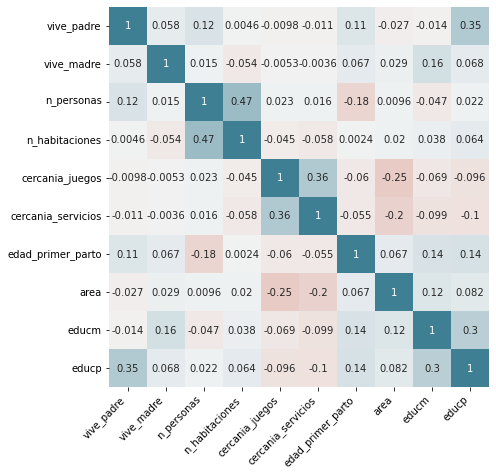

In [4]:
corr_matrix = junaeb.select_dtypes(include=['float64', 'int']).corr(method='pearson')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

sns.heatmap(corr_matrix,annot= True,cbar= False,annot_kws = {"size": 10},vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True,ax= ax)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 45,horizontalalignment = 'right',)

ax.tick_params(labelsize = 10)

In [5]:
junaeb.describe()

,vive_padre,vive_madre,n_personas,n_habitaciones,cercania_juegos,cercania_servicios,edad_primer_parto,area,educm,educp
count,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000
mean,0.685397,0.973810,4.387937,2.581587,0.181587,0.132063,22.216825,0.900635,12.653810,11.206667
std,0.464394,0.159714,1.319309,0.865000,0.385535,0.338587,5.175041,0.299175,3.901184,5.267731
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,4.000000,2.000000,0.000000,0.000000,18.000000,1.000000,11.000000,9.000000
50%,1.000000,1.000000,4.000000,2.000000,0.000000,0.000000,21.000000,1.000000,13.000000,13.000000
75%,1.000000,1.000000,5.000000,3.000000,0.000000,0.000000,25.000000,1.000000,15.000000,13.000000
max,1.000000,1.000000,12.000000,8.000000,1.000000,1.000000,44.000000,1.000000,20.000000,20.000000


# 1.1) OLS MODEL

In [6]:
y=junaeb['vive_padre']
X=junaeb[['vive_madre','n_personas','n_habitaciones','cercania_juegos','cercania_servicios','edad_primer_parto','area','educm','educp']]
X=sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             vive_padre   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     145.5
Date:                Thu, 15 Sep 2022   Prob (F-statistic):          1.69e-250
Time:                        15:12:54   Log-Likelihood:                -3510.9
No. Observations:                6300   AIC:                             7042.
Df Residuals:                    6290   BIC:                             7109.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1177      0

### 1.2) Sección comentarios OLS
 1) Las variables de control que resultan ser explicativas para el modelo de predicción sobre si el padre vive en el hogar son: la presencia de la madre en el hogar, el número de personas, el número de habitaciones, la edad del primer parto, el área y la educación de ambos padres. Esto se determina analizando el valor P de cada variable como resultado de la regresión aplicada.
 
 2) Esto quiere decir que:
 - La presencia de la madre en el hogar aumenta en un 11,83% la probabilidad de que el padre también viva en el hogar. 
 - Para el caso del número de personas, al aumentar en 1 la cantidad de personas presente en el hogar aumenta en un 5,93% la probabilidad de que el padre viva en el hogar.
 - Para el número de habitaciones tenemos que al aumentar en 1 la cantidad de habitaciones la probabilidad de que el padre viva en el hogar disminuye en un 4,88%.
 - Al aumentar en 1 año la edad del primer parto aumenta en un 0,95% la probabilidad de que el padre no viva en el hogar.
 - La probabilidad de que el padre viva en el hogar disminuye en un 7,78% si es que se vive en un área urbana (no varía si es que se vive en área rural)
 - La probabilidad de que el padre viva en el hogar disminuye en un 1,59% por cada año de escolaridad de la madre.
 - La probabilidad de que el padre viva en el hogar aumenta en un 3,37% por cada año de escolaridad del mismo padre.
 
 
 3) Podemos observar también que el estadístico F tiene una probabilidad aproximada a 0, por lo tanto se rechaza la hipótesis nula de que todos los parámetros son iguales a 0 y podemos decir que el modelo es globalmente significativo en su conjunto (explicando la variación de la variable dependiente).
 
 4) Podemos notar que el modelo OLS explica de buena manera la probabilidad, esto debido a que la mayoría de las variables con las que se están trabajando son binarias y las únicas que no son binarias serían el número de habitaciones, número de personas y años de escolaridad, por lo que para este caso el modelo OLS puede ser una buena opción para estimar la variable dependiente.
 
 5) Además resulta importante recalcar que de base ya existe un 11,77% de probabilidad de que los padres vivan en el hogar.

# 2.1) Probit Model

In [7]:
model = sm.Probit(y, X)
probit_model = model.fit()
print(probit_model.summary())
mfx = probit_model.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.536346
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:             vive_padre   No. Observations:                 6300
Model:                         Probit   Df Residuals:                     6290
Method:                           MLE   Df Model:                            9
Date:                Thu, 15 Sep 2022   Pseudo R-squ.:                  0.1387
Time:                        15:12:54   Log-Likelihood:                -3379.0
converged:                       True   LL-Null:                       -3923.2
Covariance Type:            nonrobust   LLR p-value:                1.413e-228
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.2297      0.160     -7.678      0.000      -1.544      -0.916
vive_

### 2.2) Sección comentarios Probit
 1) Las variables de control que resultan ser explicativas para el modelo de predicción sobre si el padre vive en el hogar son: la presencia de la madre en el hogar, el número de personas, el número de habitaciones, la edad del primer parto, el área y la educación de ambos padres. Esto se determina analizando el valor P de cada variable como resultado de la regresión aplicada.
 
 2) Esto quiere decir que:
 - La presencia de la madre en el hogar aumenta en un 10,09% la probabilidad de que el padre también viva en el hogar. 
 - Para el caso del número de personas, al aumentar en 1 la cantidad de personas presente en el hogar aumenta en un 5,74% la probabilidad de que el padre viva en el hogar.
 - Para el número de habitaciones tenemos que al aumentar en 1 la cantidad de habitaciones la probabilidad de que el padre viva en el hogar disminuye en un 4,66% aproximadamente.
 - Al aumentar en 1 año la edad del primer parto aumenta en un 1,03% la probabilidad de que el padre no viva en el hogar.
 - La probabilidad de que el padre viva en el hogar disminuye en un 7,20% si es que se vive en un área urbana (no varía si es que se vive en área rural)
 - La probabilidad de que el padre viva en el hogar disminuye en un 1,56% por cada año de escolaridad de la madre.
 - La probabilidad de que el padre viva en el hogar aumenta en un 3,01% por cada año de escolaridad del mismo padre.
 
 
 3) Al fijarnos en el LLR p-value (1.413e-228) podemos notar que el número muestra ser tan pequeño que se puede aproximar a 0, lo que nos permite afirmar que el modelo es capaz de explicar correctamente la probabilidad de que los padres se encuentren o no en los hogares.

# 3.1) Logit Model

In [8]:
model = sm.Logit(y, X)
logit_model = model.fit()
print(logit_model.summary())

mfx = logit_model.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.534125
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             vive_padre   No. Observations:                 6300
Model:                          Logit   Df Residuals:                     6290
Method:                           MLE   Df Model:                            9
Date:                Thu, 15 Sep 2022   Pseudo R-squ.:                  0.1423
Time:                        15:12:55   Log-Likelihood:                -3365.0
converged:                       True   LL-Null:                       -3923.2
Covariance Type:            nonrobust   LLR p-value:                1.294e-234
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.1406      0.274     -7.810      0.000      -2.678      -1.603
vive_

### 3.2) Sección comentarios Logit
 1) Las variables de control que resultan ser explicativas para el modelo de predicción sobre si el padre vive en el hogar son: la presencia de la madre en el hogar, el número de personas, el número de habitaciones, la edad del primer parto, el área y la educación de ambos padres. Esto se determina analizando el valor P de cada variable como resultado de la regresión aplicada.
 
 2) Esto quiere decir que:
 - La presencia de la madre en el hogar aumenta en un 10,56% la probabilidad de que el padre también viva en el hogar. 
 - Para el caso del número de personas, al aumentar en 1 la cantidad de personas presente en el hogar aumenta en un 5,88% la probabilidad de que el padre viva en el hogar.
 - Para el número de habitaciones tenemos que al aumentar en 1 la cantidad de habitaciones la probabilidad de que el padre viva en el hogar disminuye en un 4,60% aproximadamente.
 - Al aumentar en 1 año la edad del primer parto aumenta en un 1,06% la probabilidad de que el padre no viva en el hogar.
 - La probabilidad de que el padre viva en el hogar disminuye en un 7,05% si es que se vive en un área urbana (no varía si es que se vive en área rural)
 - La probabilidad de que el padre viva en el hogar disminuye en un 1,68% por cada año de escolaridad de la madre.
 - La probabilidad de que el padre viva en el hogar aumenta en un 3,00% por cada año de escolaridad del mismo padre.
 
 
 3) Al fijarnos en el LLR p-value (1.294e-234) podemos notar que el número muestra ser tan pequeño que se puede aproximar a 0, lo que nos permite afirmar que el modelo es capaz de explicar correctamente la probabilidad de que los padres se encuentren o no en los hogares.

# 4.1) Comparativa modelos OLS,  Probit, Logit

Desde el punto de vista de los parámetros tanto Logit, Probit y el modelo OLS identifican los mismo parámetros significativos. Además, no existen grandes diferencias en los valores de estos parámetros entre los modelos Logit y Probit, sin embargo, si hay diferencias en los valores de estos parámetros para el modelo OLS, esto se debe a la lógica que hay detrás de cada modelo, ya que en OLS no se ajusta una función de probabilidad de 0 a 1, sino que se ajusta una recta, lo que lo convierte en un modelo que si bien logra determinar las variables que son significativas, puede llegar a conclusiones erroneas al tener que analizar datos muy alejados de la distribución.

En base a las pruebas estadísticas y el ajuste al modelo (R^2), el mejor modelo para estudiar la probabilidad de que el padre viva en el hogar es el modelo Logit.

# 5.1) Modelo Poisson

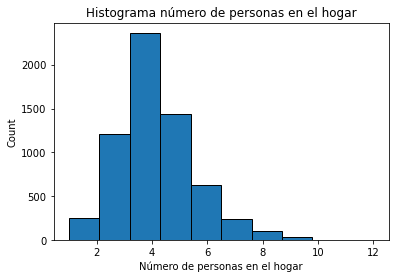

In [9]:
subset=junaeb.loc[junaeb['n_personas']<500]
y=subset['n_personas']
X=subset[['vive_padre','vive_madre','n_habitaciones','cercania_juegos','cercania_servicios','edad_primer_parto','area','educm','educp']]
plt.hist(subset.n_personas,ec="black")
plt.xlabel("Número de personas en el hogar")
plt.ylabel("Count")
plt.title("Histograma número de personas en el hogar")
plt.show()


In [10]:
poisson=sm.GLM(y,X,family=sm.families.Poisson()).fit()
print(poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             n_personas   No. Observations:                 6300
Model:                            GLM   Df Residuals:                     6291
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11504.
Date:                Thu, 15 Sep 2022   Deviance:                       2126.4
Time:                        15:12:55   Pearson chi2:                 2.38e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04207
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
vive_padre             0.1225      0

### 5.2) Sección comentarios Poisson
1) Parámetros significativos para el modelo estimado son: vive padre, vive madre, número de habitaciones, cercanía juegos, cercanía servicios, edad del primer parto y área.

2) La interpretación de los resultados obtenidos por la aplicación del modelo Poisson son los siguientes:
- Para el coeficiente de Poisson de la variable vive padre, cuando los demás factores se mantienen constantes, el número esperado de habitantes en el hogar se estima cerca de un (exp(0,1193)-1)x100 mayor que para el caso en el que los padres no vivan en el hogar. Para el caso de que el padre viva en la casa hay 1,12 mas personas en hogar que en el caso en que no viva el padre.
- Para el coeficiente de Poisson de la variable vive madre, cuando los demás factores se mantienen constantes, el número esperado de habitantes en el hogar se estima cerca de un (exp(0,6206)-1)x100 mayor que para el caso en el que las madres no vivan en el hogar. Otra interpretación es si la madre vive en la casa hay 1,73 personas más personas en el hogar que en el caso donde no está la madre.
- Cada habitación adiconal se asocia a un aumento en el número de personas por un factor de 1,22, en otra palabras, por ejemplo una casa que tenga 2 habitaciones , se espera que en promedio haya una persona más habite en el hogar que una casa con 1 habitación. Otra forma de verlo es que por cada habitación se asocia a un 22% de probabilidad de habite una persona adicional en el hogar.
- Para la variable de cercanía de juegos, los hagares que se encunetran cerca de juegos infantiles tienen 1,1072 veces más habitantes en el hogar que en hogares donde no hay juegos cercanos. 
- Los hagares que se encunetran cerca de servicios de salud tienen 1,1319 veces más habitantes en el hogar que en hogares donde no hay servicios de salud cercanos. 
- La cantidad de personas que vivien en el hogar disminuyen un 0,45% cuando aumenta en un año la edad en la que la madre tuvo el primer parto.
- Para el coeficiente de Poisson de la variable área, cuando los demás factores se mantienen constantes, el número esperado de habitantes en el hogar se estima cerca de un (exp(0,1682)-1)x100 mayor cuando se vive en una zona urbana que en una zona rural.

In [11]:
print("fitted lambda")
print(poisson.mu)

fitted lambda
[5.12664504 4.29585588 4.90198006 ... 3.34936774 3.89013945 4.21703651]


# 6.1) Test overdispersion

In [12]:
aux=((y-poisson.mu)**2-poisson.mu)/poisson.mu
auxr=sm.OLS(aux,poisson.mu).fit()
print(auxr.params)

x1   -0.144656
dtype: float64


## 6.2) Comentario Test overdispersion

En base al resultado obtenido por la aplicación del test de sobredispersión, notamos que el valor de $\alpha$ es menor a 0, por ende podemos evidenciar que no existe sobredispersión en los datos, de igual forma si analizamos el histograma de la distribución de la variable "número de personas", notamos que la media es 4, que no tiene un comportamiento sesgado en un único valor y tampoco existen ceros en la muestra. El hecho de que no existan ceros en la muestra implica que no hay motivos para que se aplique el modelo Binomial Negativo


# 7.1) Modelo Binomial Negativo

In [13]:
negbin=sm.GLM(y,X,family=sm.families.NegativeBinomial()).fit()
print(negbin.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             n_personas   No. Observations:                 6300
Model:                            GLM   Df Residuals:                     6291
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16269.
Date:                Thu, 15 Sep 2022   Deviance:                       410.23
Time:                        15:12:55   Pearson chi2:                     482.
No. Iterations:                     9   Pseudo R-squ. (CS):           0.005417
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
vive_padre             0.1336      0

## 7.2) Comentario Modelo Binomial Negativo

1) Como se menciona anteriormente, no es necesario estimar el modelo binomial negativo debido a que no existe una sobredispersión en la muestra. De todos modos se estima el modelo utilizando un $\lambda$ igual a 1 por defecto.

2) En base a los parámetros la única diferencia que existe con respecto a los resultados obtenidos del modelo Poisson es que la variable "edad_primer_parto" en este modelo demuestra no ser significativa.

# 8.1) Comparativa resultados Poisson, Test overdispersion y Modelo Binomial Negativo

1) Reiterando la información expuesta anteriormente, notamos que el valor de $\alpha$ obtenido del Test de Sobredispersión es menor a 0, lo que quiere decir que no hay una sobredispersión en la muestra, lo que a su vez implica que no es necesaria la aplicación de un modelo Binomial Negativo.

2) Ahora bien, el mejor modelo para explicar la variable de estudio es el modelo Poisson, esto debido a que se cumplen los requisitos (que no haya sobredispersión ni una gran presencia de ceros) para que el modelo pueda entregar resultados fiables y robustos.
